# Vamos carregar os módulos que precisaremos adiante

In [1]:
import numpy as np
import matplotlib.pyplot as pp

# Função auxiliar

A função abaixo constrói gráficos ilustrativos do método de Newton. Você pode ler o código para tentar aprender alguns comandos de criação de gráficos do Python, mas não precisa estudar como parte da disciplina.

In [2]:
def ilustra_newton( f, df, x, interval = None, delta = 2, npoints = 100, root = None, k = 0 ):
    
    if interval is None:
        interval = ( x - delta / 2, x + delta / 2 )
        
    ( a, b ) = interval
        
    X = np.linspace( a, b, npoints )
    Y = f( X )
    
    # Eixo x:
    pp.plot( [ X.min(), X.max() ], [ 0, 0 ], 'k' )
    # Função
    try:
        pp.plot( X, Y, color = pp.gca().lines[ 1 ].get_color() )
    except:
        pp.plot( X, Y )
    
    # Raiz:
    if not root is None:
        pp.scatter( root, f( root ), color = pp.gca().lines[ 1 ].get_color(), zorder = 10 )

    # Ponto atual
    pp.scatter( x, f( x ), color = pp.gca().lines[ 1 ].get_color(), zorder = 10 )
    pp.annotate(
        "$x_{%d}$" % ( k, ),
        ( x, 0 ),
        textcoords = "offset points",
        xytext = ( -4, -15 )
    )
    pp.scatter( x, 0, color = 'k', zorder = 10 )
    pp.plot( [ x, x ], [ 0, f( x ) ], 'k:' )
    
    # Reta tangente:
    pp.plot( X, ( X - x ) * df( x ) + f( x ) )
   
    # Próxima iteração
    x_next = x - f( x ) / df( x )
    pp.scatter( x_next, 0, color = pp.gca().lines[ -1 ].get_color(), zorder = 10 )
    pp.annotate(
        "$x_{%d}$" % ( k + 1, ),
        ( x_next, 0 ),
        textcoords = "offset points",
        xytext = ( -4, -15 )
    )

    # Configuração dos eixos:
    pp.axis( 'equal' )
    
    tmp = ( Y.max() - Y.min() ) * 0.05
    pp.axis( ( X.min(), X.max(), Y.min() - tmp, Y.max() + tmp ) )
    
    return x_next

# Método de Newton

O método de Newton tenta resolver o problema
$$\large
f( x^* ) = 0
$$
substituindo a função $f$ por uma aproximação linear para ela.

Dada uma aproximação inicial $x_k$, atualizaremos a aproximação para $x_{k + 1}$ calculando o ponto onde a tangente ao gráfico da função em $\bigl( x_k, f( x_k ) \bigr)$ cruza o eixo horizontal.

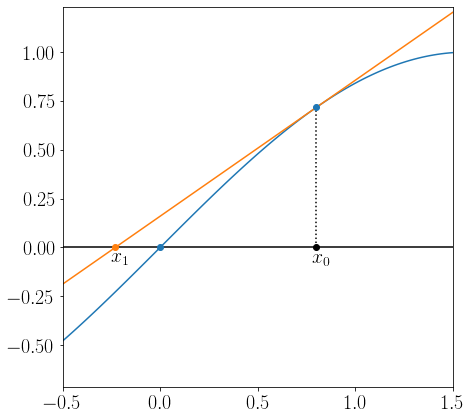

In [3]:
pp.rc( 'text', usetex = True )
pp.rc( 'font', size = 20, family = 'serif' )

pp.figure( figsize = ( 7, 7 ) )
ilustra_newton( np.sin, np.cos, 0.8, interval = ( -0.5, 1.5 ), root = 0 )
pp.show()

Observando a figura, vemos que

$$\large
( x_k - x_{k + 1} )\tan\alpha = f( x_{k} ).
$$
Manipulando obtemos

$$\large
x_k - x_{k + 1} = \frac{f( x_k )}{\tan\alpha}
$$

$$\large
x_{k + 1} = x_k - \frac{f( x_k )}{\tan\alpha}.
$$

Mas $\tan\alpha = f'( x_k )$, logo:

$$\large
x_{k + 1} = x_k - \frac{f( x_k )}{f'( x_k )}
$$

# Exemplo: repetidas iterações do MN

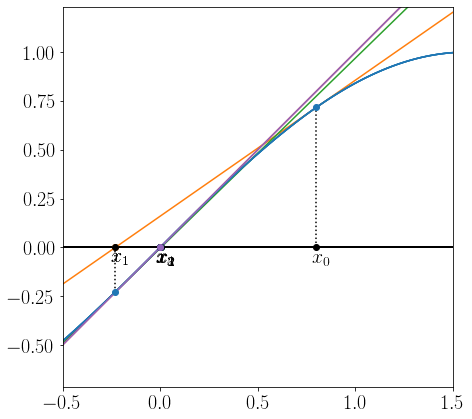

In [4]:
pp.figure( figsize = ( 7, 7 ) )
x = 0.8
for i in range( 4 ):
    x = ilustra_newton( np.sin, np.cos, x, interval = ( -0.5, 1.5 ), root = 0, k = i )
pp.show()

# Convergência do Método de Newton

**Teorema** Seja $f : \mathbb R \to \mathbb R$ duas vezes continuamente diferenciável. Suponha que $f( x^* ) = 0$, $f'( x^* ) \neq 0$ e que $x_0$ esteja suficientemente próximo de $x^*$. Então a sequência $\{ x_k \}$ gerada pelo Método de Newton satisfaz

$$\large
\lim_{k \to \infty}x_k = x^*
$$
e
$$\large
\lim_{k \to \infty} \frac{| x_{k + 1} - x^* |}{| x_k - x^* |^2} = \left|\frac{f''( x^* )}{2f'( x^* )}\right|.
$$

Observe que, grosso modo,
$$\large
| x_{k + 1} - x^* | \approx | x_k - x^* | \left( | x_k - x^* | c \right).
$$
Isso significa que quanto mais próximo de $x^*$ a iteração atual está, mais rápido o progresso do algoritmo. É comum dizermos que o método de Newton dobra o número de algarismos corretos na aproximação a cada passo (vou comentar em aula, mas explique essa afirmação como exercício).

# Esboço da demonstração

A ideia é utilizar a série de Taylor e escrever

$$\large
f( x_k ) + f'( x_k )( x^* - x_k ) + \frac{f''( \xi_k )}2( x^* - x_k )^2 = f( x^* ) = 0,
$$

onde $\xi_k$ está entre $x_k$ e $x^*$. Se $f'( x_k ) \ne 0$, temos:

$$\large
\begin{split}
    \frac{f( x_k )}{f'( x_k )} + ( x^* - x_k ) + \frac{f''( \xi_k )}{2f'(x_k)}( x^* - x_k )^2 &{}= 0\\
    x^* - x_{k + 1} + \frac{f''( \xi_k )}{2f'(x_k)}( x^* - x_k )^2 &{}= 0.
\end{split}
$$
Ou seja,
$$\large
    x^* - x_{k + 1} = -\frac{f''( \xi_k )}{2f'(x_k)}( x^* - x_k )^2
$$
e, portanto,
$$\large
    \frac{x^* - x_{k + 1}}{( x^* - x_k )^2} = -\frac{f''( \xi_k )}{2f'(x_k)}.
$$

Até aqui omitimos alguns detalhes, a demonstração completa pode ser encontrada na bibliografia.

# Brincando com as hipóteses

Como o Método de Newton se comporta se alguma das hipóteses do teorema de convergência não for satisfeita. Ou seja, se:

1. Não existir uma raiz $x^*$ tal que $f( x^* ) = 0$
2. $f'( x^* ) = 0$
3. $x_0$ está distante de $x^*$

In [5]:
def newton( f, df, x, tol = 1e-10, return_niter = False ):
    
    niter = 1
    
    x_pre = x
    x = x - f( x ) / df( x )
    
    while abs( x - x_pre ) > tol:
        
        x_pre = x
        x = x - f( x ) / df( x )
        
        niter = niter + 1
        
    if return_niter:
        return ( x, niter )
    else:
        return x

In [6]:
L = 2
r = 0.25

V = 0.1

def F( h ):
    res = ( r ** 2 ) * np.arcsin( ( h - r ) / r )
    res += r * ( h - r ) * np.sqrt( 1 - ( ( h - r ) / r ) ** 2 )
    
    return res

def f_cocho( h ):
    
    return L * ( F( h ) - F( 0 ) ) - V

def df_cocho( h ):
    
    return 2 * L * np.sqrt( r ** 2 - ( h - r ) ** 2 )

In [7]:
( h_newton, niter_newton ) = newton( f_cocho, df_cocho, 0.1, tol = 1e-14, return_niter = True )
print( h_newton, 2 * niter_newton )

0.1509982981816477 10


In [8]:
def bisseccao( f, a, b, tol = 1e-10, return_niter = False ):
    
    niter = 0
    
    while abs( b - a ) > 2.0 * tol:
        
        niter = niter + 1
        
        c = ( a + b ) / 2.0
        
        if f( a ) * f( c ) < 0.0:
            b = c
        elif f( b ) * f( c ) < 0.0:
            a = c
        else:
            if return_niter:
                return ( c, niter )
            else:
                return c
        
    if return_niter:
        return ( ( a + b ) / 2.0, niter )
    else:
        return ( a + b ) / 2.0

In [9]:
( h_bissec, niter_bissec ) = bisseccao( f_cocho, 0.1, 0.2, tol = 1e-14, return_niter = True )
print( h_bissec, niter_bissec )

0.150998298181645 43


In [10]:
# Exemplo: tentando encontrar uma raiz que não existe

( x, niter ) = newton( np.exp, np.exp, 0, return_niter = True )
print( x, niter )

nan 747


/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


# Brincando com as hipóteses

Como o Método de Newton se comporta se alguma das hipóteses do teorema de convergência não for satisfeita. Ou seja, se:

1. Não existir uma raiz $x^*$ tal que $f( x^* ) = 0$
2. $f'( x^* ) = 0$
3. $x_0$ está distante de $x^*$

In [11]:
def f( x ):
    
    return np.cos( x ) + 1.0

def df( x ):
    
    return -np.sin( x )

In [12]:
# Exemplo: tentando encontrar uma raiz múltipla ( f'( x^* ) = 0 )

( x, niter ) = newton( f, df, 3.1, return_niter = True )
print( x, niter )

3.141592644269214 23


In [13]:
# Exemplo: tentando encontrar uma raiz múltipla ( f'( x^* ) = 0 ). Versão usamndo lambda

( x, niter ) = newton(
    lambda x : np.cos( x ) + 1,
    lambda x : -np.sin( x ),
    3.1,
    return_niter = True
)
print( x, niter )

3.141592644269214 23


(0.0, 5.0, -0.25, 0.25)

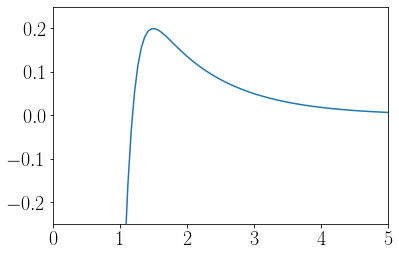

In [14]:
x = np.linspace( 0, 5, 100 )
def f( x ):
    
    return np.exp( -x ) - 20 * np.exp( -3 * x ** 2 )

def df( x ):
    
    return -np.exp( -x ) + 120 * x * np.exp( -3 * x ** 2 )

pp.plot( x, f( x ) )
#pp.plot( x, df( x ) )
pp.axis( ( x.min(), x.max(), -0.25, 0.25 ) )

In [15]:
# Começando "bem"

( x, niter ) = newton( f, df, 1.0, return_niter = True )
print( x, niter )

1.1797585688629948 6


In [16]:
# Começando "mal"

( x, niter ) = newton( f, df, 1.5, return_niter = True )
print( x, niter )

nan 730


/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [17]:
# Funcionando "bem demais"

( x, niter ) = newton( np.sin, np.cos, 3.1, return_niter = True )
print( x, niter )

# Exercício: encontre outros exemplos em que isso ocorra

3.141592653589793 3


In [18]:
print( x - np.pi )

0.0
